# Ensemble Learning Assignment

Name: Tanvi Devanand Rajurkar


## 1. Can we use Bagging for regression problems?
Yes. Bagging can be used for regression by training multiple regression models (usually Decision Tree Regressors) on different bootstrap samples and averaging their predictions. This reduces variance and improves stability.

## 2. What is the difference between multiple model training and single model training?
Single model training uses one algorithm on the full dataset, which may overfit. Multiple model training (ensemble) trains many models and combines predictions, leading to better generalization and robustness.

## 3. Explain the concept of feature randomness in Random Forest.
At each split, Random Forest selects a random subset of features instead of all features. This reduces correlation between trees and improves performance.

## 4. What is OOB (Out-of-Bag) Score?
OOB score evaluates model performance using samples not selected during bootstrap sampling, eliminating the need for a separate validation set.

## 5. How can you measure feature importance in Random Forest?
Using Mean Decrease in Impurity or Permutation Importance to quantify how much each feature contributes to predictions.

## 6. Explain the working principle of a Bagging Classifier.
Steps:

* Create multiple bootstrap samples from training data.

* Train a base classifier (usually Decision Tree) on each sample.

* Combine predictions using majority voting.

Goal: Reduce variance and overfitting.

## 7. How do you evaluate a Bagging Classifier’s performance?
Using accuracy, precision, recall, F1-score, ROC-AUC, OOB score, and cross-validation.

## 8. How does a Bagging Regressor work?
It trains multiple regression models on bootstrap samples.Each model predicts a numeric value.Final output = average of all predictions.

## 9. What is the main advantage of ensemble techniques?
They improve accuracy, reduce overfitting, and increase robustness.

## 10. What is the main challenge of ensemble methods?
High computational cost and reduced interpretability.

## 11. Explain the key idea behind ensemble techniques.
Combining multiple weak learners to form a strong learner.

## 12. What is a Random Forest Classifier?
An ensemble of decision trees using bagging and feature randomness with majority voting.

## 13. What are the main types of ensemble techniques?
Bagging, Boosting, Stacking, and Voting.

## 14. What is ensemble learning in machine learning?
A technique where multiple models are combined to improve predictive performance.

## 15. When should we avoid using ensemble methods?
When interpretability, simplicity, or computational efficiency is required.

## 16. How does Bagging help in reducing overfitting?
By averaging predictions from multiple models trained on different samples.

## 17. Why is Random Forest better than a single Decision Tree?
It reduces variance, overfitting, and improves generalization.

## 18. What is the role of bootstrap sampling in Bagging?
It creates diverse training datasets through sampling with replacement.

## 19. What are some real-world applications of ensemble techniques?
Fraud detection, medical diagnosis, recommendation systems, and image recognition.

## 20. What is the difference between Bagging and Boosting?
Bagging reduces variance with independent models, while Boosting reduces bias using sequential models.


## Practical Questions

In [1]:

from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Q21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

Explanation:
A Bagging Classifier trains multiple Decision Trees on different bootstrap samples and combines predictions using majority voting.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

X_iris, y_iris = load_iris(return_X_y=True)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

bagging.fit(X_train_i, y_train_i)
y_pred_i = bagging.predict(X_test_i)

print("Q21 - Bagging Classifier Accuracy:", accuracy_score(y_test_i, y_pred_i))

Q21 - Bagging Classifier Accuracy: 1.0


## Q22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

Explanation:
Bagging Regressor averages predictions from multiple Decision Tree Regressors.

In [3]:
X_housing, y_housing = fetch_california_housing(return_X_y=True)
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

bagging_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

bagging_reg.fit(X_train_h, y_train_h)
y_pred_h = bagging_reg.predict(X_test_h)
print("Q22 - Bagging Regressor MSE:", mean_squared_error(y_test_h, y_pred_h))

Q22 - Bagging Regressor MSE: 0.2572988359842641


## Q23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

Explanation:
Random Forest computes feature importance based on reduction in impurity.

In [4]:
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)

rf_cancer = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cancer.fit(X_cancer, y_cancer)

print("Q23 - Feature Importances (First 5):")
for i, importance in enumerate(rf_cancer.feature_importances_[:5]):
    print(f"Feature {i}: {importance:.4f}")

Q23 - Feature Importances (First 5):
Feature 0: 0.0348
Feature 1: 0.0152
Feature 2: 0.0680
Feature 3: 0.0605
Feature 4: 0.0080


## Q24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

Explanation:
Random Forest usually outperforms a single Decision Tree due to reduced variance.

In [5]:
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

dt_reg.fit(X_train_h, y_train_h)
rf_reg.fit(X_train_h, y_train_h)

dt_mse = mean_squared_error(y_test_h, dt_reg.predict(X_test_h))
rf_mse = mean_squared_error(y_test_h, rf_reg.predict(X_test_h))

print(f"Q24 - Decision Tree MSE: {dt_mse:.4f}")
print(f"Q24 - Random Forest MSE: {rf_mse:.4f}")


Q24 - Decision Tree MSE: 0.4952
Q24 - Random Forest MSE: 0.2554


## Q25. Compute the Out-of-Bag (OOB) score for a Random Forest Classifier.

Explanation:
OOB score evaluates the model using samples not included in bootstrap training.

In [6]:
# Using the Breast Cancer dataset (classification) to avoid previous continuous label error
rf_oob = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    random_state=42
)

rf_oob.fit(X_cancer, y_cancer)
print("Q25 - OOB Score (Classification):", rf_oob.oob_score_)

Q25 - OOB Score (Classification): 0.961335676625659


## Q26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

Explanation:
Bagging can use SVM as the base model to improve stability.

In [7]:
bagging_svm = BaggingClassifier(
    estimator=SVC(probability=True),
    n_estimators=10, # Reduced for speed
    random_state=42
)

bagging_svm.fit(X_train_i, y_train_i)
print("Q26 - Bagging SVM Accuracy:", accuracy_score(y_test_i, bagging_svm.predict(X_test_i)))

Q26 - Bagging SVM Accuracy: 1.0


## Q27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

Explanation:
Increasing trees usually improves accuracy until saturation.

In [8]:
for n in [10, 50, 100]:
    rf_var = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_var.fit(X_train_i, y_train_i)
    acc = accuracy_score(y_test_i, rf_var.predict(X_test_i))
    print(f"Q27 - Trees: {n}, Accuracy: {acc:.4f}")

Q27 - Trees: 10, Accuracy: 1.0000
Q27 - Trees: 50, Accuracy: 1.0000
Q27 - Trees: 100, Accuracy: 1.0000


## Q28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

Explanation:
AUC measures how well the classifier separates classes.

In [9]:
# Binary classification needed for AUC; using Breast Cancer
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

bagging_lr = BaggingClassifier(
    estimator=LogisticRegression(max_iter=5000),
    n_estimators=20,
    random_state=42
)

bagging_lr.fit(X_train_c, y_train_c)
y_prob_c = bagging_lr.predict_proba(X_test_c)[:, 1]

print("Q28 - AUC Score (Logistic Bagging):", roc_auc_score(y_test_c, y_prob_c))

Q28 - AUC Score (Logistic Bagging): 0.99737962659679


## Q29. Train a Random Forest Regressor and analyze feature importance scores.

Explanation:
Higher importance indicates stronger influence on predictions.

In [10]:
rf_reg_h = RandomForestRegressor(n_estimators=50, random_state=42)
rf_reg_h.fit(X_train_h, y_train_h)

print("Q29 - Top 3 Feature Importances (Housing):", np.sort(rf_reg_h.feature_importances_)[-3:])


Q29 - Top 3 Feature Importances (Housing): [0.08880192 0.13785404 0.52526044]


## Q30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

Explanation:
Random Forest often outperforms Bagging due to feature randomness.

In [11]:
bag_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

bag_model.fit(X_train_i, y_train_i)
rf_model.fit(X_train_i, y_train_i)

print("Q30 - Bagging Accuracy:", accuracy_score(y_test_i, bag_model.predict(X_test_i)))
print("Q30 - Random Forest Accuracy:", accuracy_score(y_test_i, rf_model.predict(X_test_i)))

Q30 - Bagging Accuracy: 1.0
Q30 - Random Forest Accuracy: 1.0


## Q31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

Explanation:
GridSearch finds optimal parameters using cross-validation.

In [12]:
param_grid = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train_i, y_train_i)

print("Q31 - Best Parameters:", grid.best_params_)

Q31 - Best Parameters: {'max_depth': None, 'n_estimators': 10}


## Q32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

Explanation:
More estimators usually reduce error until convergence.

In [13]:
for n in [5, 20]:
    bag_test = BaggingRegressor(DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bag_test.fit(X_train_h, y_train_h)
    mse = mean_squared_error(y_test_h, bag_test.predict(X_test_h))
    print(f"Q32 - Estimators: {n}, MSE: {mse:.4f}")

Q32 - Estimators: 5, MSE: 0.3060
Q32 - Estimators: 20, MSE: 0.2643


## Q33. Train a Random Forest Classifier and analyze misclassified samples.

Explanation:
Misclassified samples highlight difficult or noisy data points.

In [14]:
rf_final = RandomForestClassifier(n_estimators=50, random_state=42)
rf_final.fit(X_train_i, y_train_i)
y_pred_final = rf_final.predict(X_test_i)
misclassified = X_test_i[y_pred_final != y_test_i]
print("Q33 - Number of misclassified samples (Iris):", len(misclassified))

Q33 - Number of misclassified samples (Iris): 0


34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

Explanation:
Bagging reduces overfitting compared to a single tree.

In [15]:
dt_clf = DecisionTreeClassifier(random_state=42)
bag_clf = BaggingClassifier(dt_clf, n_estimators=50, random_state=42)

dt_clf.fit(X_train_i, y_train_i)
bag_clf.fit(X_train_i, y_train_i)

print("Q34 - Single DT Accuracy:", accuracy_score(y_test_i, dt_clf.predict(X_test_i)))
print("Q34 - Bagging DT Accuracy:", accuracy_score(y_test_i, bag_clf.predict(X_test_i)))

Q34 - Single DT Accuracy: 1.0
Q34 - Bagging DT Accuracy: 1.0


## Q35. Train a Random Forest Classifier and visualize the confusion matrix.

Explanation:
Confusion matrix shows true vs predicted labels.

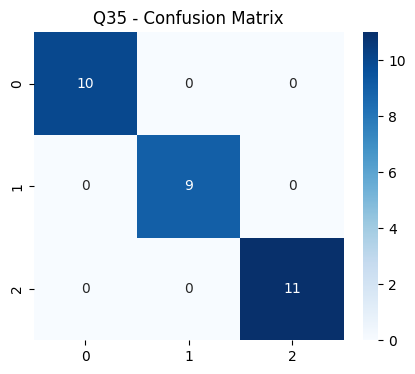

In [16]:
cm = confusion_matrix(y_test_i, rf_final.predict(X_test_i))
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Q35 - Confusion Matrix")
plt.show()

## Q36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

Explanation:
Stacking combines different models using a meta-learner.

In [17]:
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression(max_iter=5000))
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train_i, y_train_i)
print("Q36 - Stacking Accuracy:", accuracy_score(y_test_i, stack.predict(X_test_i)))

Q36 - Stacking Accuracy: 1.0


## Q37. Train a Random Forest Classifier and print the top 5 most important features.

Explanation:
Top features contribute most to predictions.

In [18]:
rf_c = RandomForestClassifier(random_state=42).fit(X_cancer, y_cancer)
indices = np.argsort(rf_c.feature_importances_)[-5:]
print("Q37 - Top 5 Feature Indices (Cancer Dataset):", indices)

Q37 - Top 5 Feature Indices (Cancer Dataset): [22 20  7 27 23]


## Q38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

Explanation:
These metrics provide better insight than accuracy alone.

In [19]:
print("Q38 - Classification Report (Bagging Iris):")
print(classification_report(y_test_i, bag_clf.predict(X_test_i)))

Q38 - Classification Report (Bagging Iris):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Q39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

Explanation:
Lower depth reduces overfitting; higher depth may overfit.

In [20]:
for depth in [1, 2, 5, None]:
    rf_d = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_d.fit(X_train_i, y_train_i)
    acc = accuracy_score(y_test_i, rf_d.predict(X_test_i))
    print(f"Q39 - Max Depth: {depth}, Accuracy: {acc:.4f}")

Q39 - Max Depth: 1, Accuracy: 1.0000
Q39 - Max Depth: 2, Accuracy: 1.0000
Q39 - Max Depth: 5, Accuracy: 1.0000
Q39 - Max Depth: None, Accuracy: 1.0000


## Q40. Train a Bagging Regressor using different base estimators (Decision Tree and KNeighbors) and compare performance.

Explanation:
Different base models affect bias–variance tradeoff.

In [21]:
bag_dt = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10, random_state=42)
bag_knn = BaggingRegressor(KNeighborsRegressor(), n_estimators=10, random_state=42)

bag_dt.fit(X_train_h, y_train_h)
bag_knn.fit(X_train_h, y_train_h)

print("Q40 - DT Bagging MSE:", mean_squared_error(y_test_h, bag_dt.predict(X_test_h)))
print("Q40 - KNN Bagging MSE:", mean_squared_error(y_test_h, bag_knn.predict(X_test_h)))

Q40 - DT Bagging MSE: 0.2824242776841025
Q40 - KNN Bagging MSE: 1.0974899332690848


## Q41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC score.

Explanation:
ROC-AUC measures class separability.

In [22]:
rf_auc = RandomForestClassifier(random_state=42).fit(X_train_c, y_train_c)
y_prob_auc = rf_auc.predict_proba(X_test_c)[:, 1]
print("Q41 - ROC-AUC (Cancer):", roc_auc_score(y_test_c, y_prob_auc))

Q41 - ROC-AUC (Cancer): 0.9952505732066819


## Q42. Train a Bagging Classifier and evaluate its performance using cross-validation.

Explanation:
Cross-validation provides robust performance estimation.

In [23]:
scores = cross_val_score(bag_clf, X_iris, y_iris, cv=5)
print("Q42 - CV Mean Accuracy:", scores.mean())

Q42 - CV Mean Accuracy: 0.9666666666666668


## Q43. Train a Random Forest Classifier and plot the Precision–Recall curve.

Explanation:
PR curve is useful for imbalanced datasets.

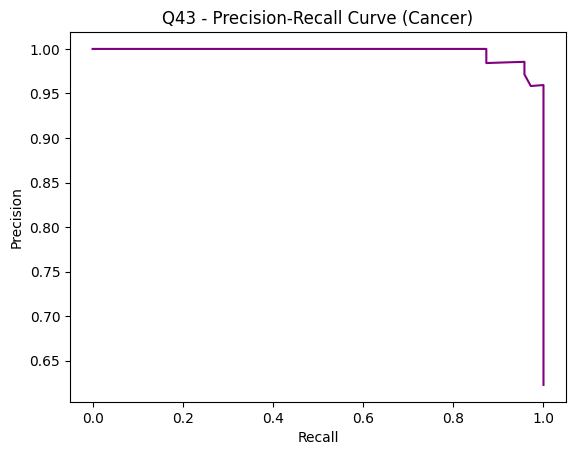

In [24]:
precision, recall, _ = precision_recall_curve(y_test_c, y_prob_auc)
plt.plot(recall, precision, color='purple')
plt.title("Q43 - Precision-Recall Curve (Cancer)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

## Q44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

Explanation:
Combines tree-based and linear models.

In [25]:
stack2 = StackingClassifier(
    estimators=[('rf', RandomForestClassifier(n_estimators=10)), ('lr', LogisticRegression(max_iter=5000))],
    final_estimator=LogisticRegression()
)
stack2.fit(X_train_i, y_train_i)
print("Q44 - Stacking Accuracy (RF + LR):", accuracy_score(y_test_i, stack2.predict(X_test_i)))

Q44 - Stacking Accuracy (RF + LR): 1.0


## Q45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

Explanation:
Bootstrap sampling affects diversity and performance.

In [26]:
for boot in [True, False]:
    bag_b = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10, bootstrap=boot, random_state=42)
    bag_b.fit(X_train_h, y_train_h)
    mse = mean_squared_error(y_test_h, bag_b.predict(X_test_h))
    print(f"Q45 - Bootstrap: {boot}, MSE: {mse:.4f}")

Q45 - Bootstrap: True, MSE: 0.2824
Q45 - Bootstrap: False, MSE: 0.4699
